In [2]:
import os
import pandas as pd

In [15]:
#Make a list of all files in directory with data we want
path = 'C:/Users/sneha/Documents/LearningPython'
outputs = [f for f in os.listdir(path) if f.endswith('__output.txt')]

In [17]:
def file_to_df(file_name):
    #Add file name to the path so we can find the file in the folder
    file_path = path + '/' + file_name
    file1 = open(file_path)
    
    #Put everything in the file in a list
    file_output = file1.readlines()
    
    #Initialize a new list
    curves = []
    
    #Go through the file and put each row of the file (a, b, splits, rank) into the list 'curves'
    for row in file_output:
        if row[0] == '*':
            curves.append(row.strip('* '))
            
    #Save the information at the end of the file about memory usage and time to compute
    last_line = file_output[-1].split()
    time_to_compute = float(last_line[2])
    memory_in_MB = float(last_line[-1].strip('MB'))
    
    #Each entry in curves is a string 'a b additives nonsplits'. To have these as separate columns,
    #we need each to be a list. 
    
    curves_for_df = []
    for curve in curves:
        curves_for_df.append(curve.split(' '))
    
    #Remove the \n from the last entry
    for curve in curves_for_df:
        curve[3] = curve[3][0]
    
    #Create a Pandas dataframe with this info
    df = pd.DataFrame(curves_for_df, columns = ['a', 'b', 'Number of Additive Primes', 'Number of Nonsplit Primes'])
    
    file1.close()
    #Return the data frame, time_to_compute, memory_in_MB
    return df, time_to_compute, memory_in_MB
    
# print(file_to_df(outputs[0]))
            
#Do this for every file! Note: Edit to make this do it for multiple files at once. 
all_files_to_df = list(map(file_to_df, outputs))
# print(all_files_to_df[0:3])

#Combine dataframes from each to one large dataframe. This is yucky and there's probably a better way to do it, but it works.
a = []
b = []
additives = []
nonsplits = []
for file in all_files_to_df:
    df_file = file[0]
    a_file = df_file['a'].tolist()
    b_file = df_file['b'].tolist()
    additives_file = df_file['Number of Additive Primes'].tolist()
    nonsplits_file = df_file['Number of Nonsplit Primes'].tolist()
    for n in a_file:
        a.append(n)
    for n in b_file:
        b.append(n)
    for n in additives_file:
        additives.append(n)
    for n in nonsplits_file:
        nonsplits.append(n)
        
data = {'a': a, 'b': b, 'Number of Additive Primes': additives , 'Number of Nonsplit Primes': nonsplits}

df = pd.DataFrame(data)

# print(df)

df.to_csv('elliptic_curve_data3.csv', index=False) 


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#Read in the data from the csv files
curve_data1 = pd.read_csv('elliptic_curve_data.csv')
curve_data2 = pd.read_csv('elliptic_curve_data3.csv')

,a,b,Number of splits,Rank
0,0,1,0,0
1,0,2,0,0
2,0,3,0,0
3,0,4,0,0
4,0,5,0,0
...,...,...,...,...
1416183,-950,95,1,1
1416184,-950,96,2,1
1416185,-950,97,3,0
1416186,-950,98,2,0


In [22]:
curve_data = pd.merge(curve_data1, curve_data2, how='left', left_on=['a', 'b'], right_on=['a', 'b'])

curve_data

,a,b,Number of splits,Rank,Number of Additive Primes,Number of Nonsplit Primes
0,0,1,0,0,1,0
1,0,1,0,0,1,0
2,0,2,0,0,2,0
3,0,2,0,0,2,0
4,0,3,0,0,1,0
...,...,...,...,...,...,...
1418879,-950,95,1,1,2,1
1418880,-950,96,2,1,0,2
1418881,-950,97,3,0,0,1
1418882,-950,98,2,0,1,2


In [23]:
curve_data = curve_data.drop_duplicates()

In [24]:
curve_data = curve_data.dropna()
curve_data

,a,b,Number of splits,Rank,Number of Additive Primes,Number of Nonsplit Primes
0,0,1,0,0,1,0
2,0,2,0,0,2,0
4,0,3,0,0,1,0
6,0,4,0,0,2,0
8,0,5,0,0,2,0
...,...,...,...,...,...,...
1418879,-950,95,1,1,2,1
1418880,-950,96,2,1,0,2
1418881,-950,97,3,0,0,1
1418882,-950,98,2,0,1,2


In [25]:
curve_data.to_csv('merged_curve_data.csv', index=False)

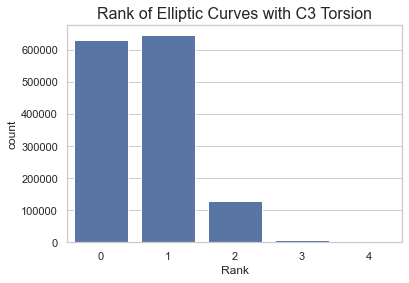

In [26]:
# sets the style of the bar charts
sns.set(style="whitegrid")

# title
plt.title('Rank of Elliptic Curves with C3 Torsion', fontsize=16)

# plots a vertical bar chart
sns.countplot(x='Rank', color="b", data=curve_data);

# saves the image
plt.savefig("rank_plot.png")

# shows the image
plt.show()

In [37]:
maximum = curve_data['Number of splits'].max()
indices = np.where(curve_data['Number of splits'] == maximum)[0]
curve_data.iloc[indices, :]

,a,b,Number of splits,Rank,Number of Additive Primes,Number of Nonsplit Primes
717114,787,330,9,0,0,0


In [34]:
import numpy as np

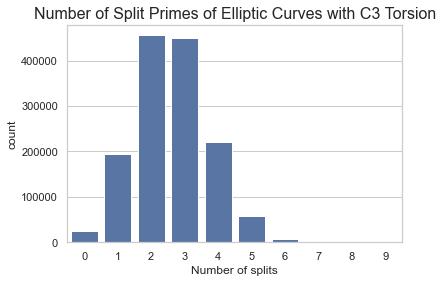

In [38]:
# sets the style of the bar charts
sns.set(style="whitegrid")

# title
plt.title('Number of Split Primes of Elliptic Curves with C3 Torsion', fontsize=16)

# plots a vertical bar chart
sns.countplot(x='Number of splits', color="b", data=curve_data);

# saves the image
plt.savefig("split_plot.png")

# shows the image
plt.show()

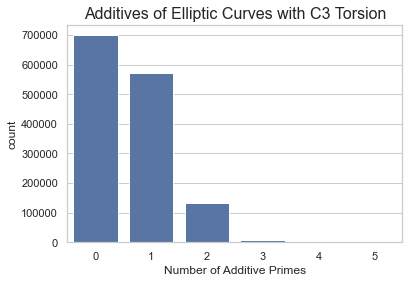

In [39]:
# sets the style of the bar charts
sns.set(style="whitegrid")

# title
plt.title('Additives of Elliptic Curves with C3 Torsion', fontsize=16)

# plots a vertical bar chart
sns.countplot(x='Number of Additive Primes', color="b", data=curve_data);

# saves the image
plt.savefig("additives_plot.png")

# shows the image
plt.show()

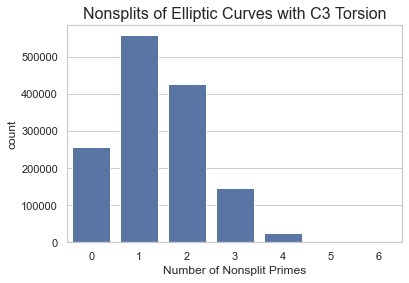

In [40]:
# sets the style of the bar charts
sns.set(style="whitegrid")

# title
plt.title('Nonsplits of Elliptic Curves with C3 Torsion', fontsize=16)

# plots a vertical bar chart
sns.countplot(x='Number of Nonsplit Primes', color="b", data=curve_data);

# saves the image
plt.savefig("nonsplits_plot.png")

# shows the image
plt.show()